# U.S. Medical Insurance Costs

## Project Scope

### Goals
- Onderzoeken welke factoren de meeste invloed hebben op medische kosten (`charges`).
- Vergelijken van gemiddelde kosten tussen rokers en niet-rokers.
- Analyseren hoe leeftijd en BMI samenhangen met de hoogte van de kosten.
- Bekijken of er regionale verschillen bestaan in kosten.
- Controleren of het aantal kinderen invloed heeft op de charges.

### Data
- Bestand: `insurance.csv`
- Kolommen:
  - age (int) → leeftijd van de persoon
  - sex (categorisch) → man/vrouw
  - bmi (float) → body mass index
  - children (int) → aantal kinderen ten laste
  - smoker (categorisch) → ja/nee
  - region (categorisch) → woonregio in de VS
  - charges (float) → medische verzekeringskosten

### Analytical Steps
1. Dataset inladen en basisstructuur verkennen.
2. Gemiddelde en spreiding van charges bekijken.
3. Groepsanalyses (smoker, region,



In [30]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
#Analyse DataSet
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [47]:
# Gemiddelde charges over de hele dataset
print("Gemiddelde kosten totaal:", df["charges"].mean())

# Gemiddelde charges per roker/niet-roker
print("Gemiddelde kosten per rokerstatus:")
print(df.groupby("smoker")["charges"].mean())

# Gemiddelde charges per regio
print("Gemiddelde kosten per regio:")
print(df.groupby("region")["charges"].mean())

Gemiddelde kosten totaal: 13270.422265141257
Gemiddelde kosten per rokerstatus:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
Gemiddelde kosten per regio:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [49]:
# Functie om gemiddelde charges per groep te berekenen
def avg_charges_by(column):
    return df.groupby(column)["charges"].mean()

# Test de functie
print("Per rokerstatus:\n", avg_charges_by("smoker"))
print("\nPer regio:\n", avg_charges_by("region"))
print("\nPer geslacht:\n", avg_charges_by("sex"))

Per rokerstatus:
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Per regio:
 region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Per geslacht:
 sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [50]:
# Functie om gemiddelde charges per groep te berekenen
def avg_charges_by(column):
    return df.groupby(column)["charges"].mean()

# Test de functie
print("Per rokerstatus:\n", avg_charges_by("smoker"))
print("\nPer regio:\n", avg_charges_by("region"))
print("\nPer geslacht:\n", avg_charges_by("sex"))

Per rokerstatus:
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Per regio:
 region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Per geslacht:
 sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [51]:
# gemiddelde van alle charges

In [53]:
def average_charges():
    return df["charges"].mean()

print("Gemiddelde charges totaal:", average_charges())

Gemiddelde charges totaal: 13270.422265141257


In [59]:
# laagste en hoogste charges
def min_max_charges():
    return df['charges'].min(), df['charges'].max
print('min en max charges', min_max_charges())

min en max charges (1121.8739, <bound method Series.max of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>)


In [63]:
#gemiddelde charges per leeftijdsgroep
def avg_charges_by_age_group():
    bins = [18, 30, 40, 50, 60, 70]
    labels = ["18-29", "30-39", "40-49", "50-59", "60-69"]
    df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
    return df.groupby("age_group")["charges"].mean()
print(avg_charges_by_age_group())

age_group
18-29     9822.837599
30-39    11639.308653
40-49    14782.043077
50-59    17062.292763
60-69    21063.163398
Name: charges, dtype: float64


C:\Users\rasto\AppData\Local\Temp\ipykernel_45984\4096845829.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby("age_group")["charges"].mean()


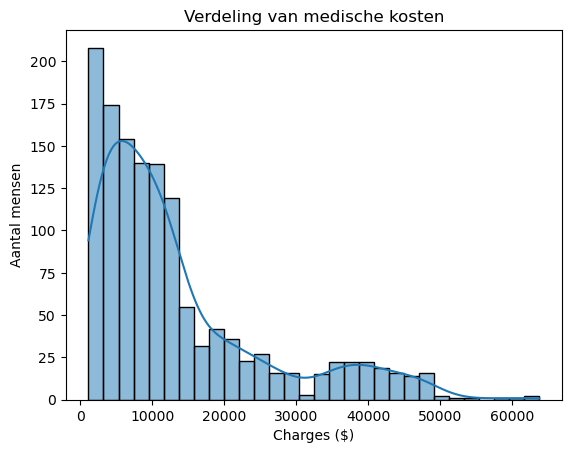

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Verdeling van medische kosten")
plt.xlabel("Charges ($)")
plt.ylabel("Aantal mensen")
plt.show()

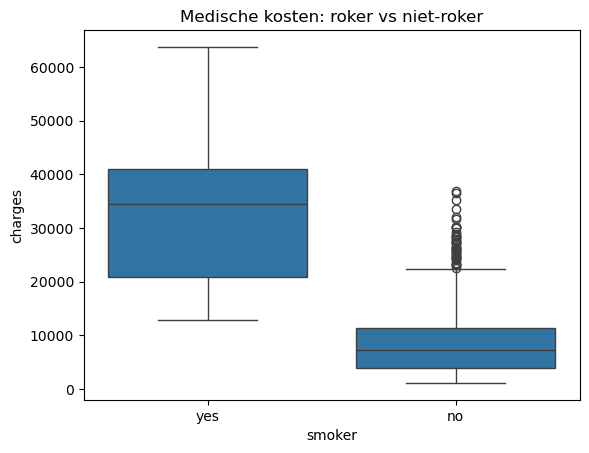

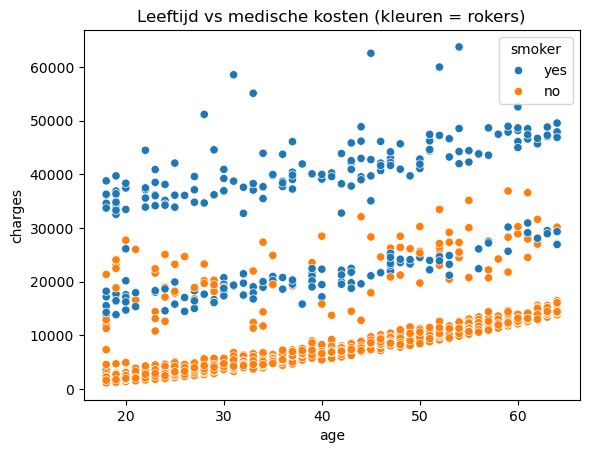

In [73]:
# medische kosten rokers vs. niet-rokers: boxplot
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Medische kosten: roker vs niet-roker")
plt.show()
# medische kosten rokers vs. niet-rokers: scatterplot
sns.scatterplot(x="age", y="charges", data=df, hue="smoker")
plt.title("Leeftijd vs medische kosten (kleuren = rokers)")
plt.show()

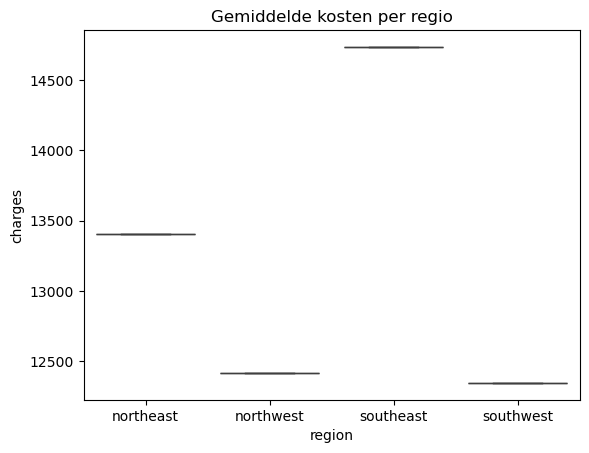

In [76]:
#gemiddelde verzekeringskosten per regio
avg_region = df.groupby("region")["charges"].mean().reset_index()
sns.boxplot(x="region", y="charges", data=avg_region)
plt.title("Gemiddelde kosten per regio")
plt.show()

# U.S. Medical Insurance Costs – Data Analysis

## 📌 Project Overview
Dit project analyseert een dataset van medische verzekeringskosten in de VS.
Het doel is te onderzoeken welke factoren de grootste invloed hebben op kosten
zoals leeftijd, BMI, roken, regio en aantal kinderen.

## ⚙️ Tools & Libraries
- Python
- Pandas
- Seaborn & Matplotlib
- Jupyter Notebook

## 🔍 Analyses
- Gemiddelde kosten totaal
- Kosten per roker/niet-roker
- Kosten per regio
- Kosten per leeftijdsgroep
- Correlatie tussen numerieke variabelen

## 📊 Key Findings
- Rokers betalen gemiddeld bijna 4x zoveel als niet-rokers.
- Leeftijd en BMI hebben een sterke positieve relatie met kosten.
- Regionale verschillen zijn aanwezig maar klein.
- Kinderen hebben nauwelijks effect op de kosten.

## 🚀 How to Run
1. Clone deze repository
2. Open `us-medical-insurance-costs.ipynb` in Jupyter Notebook
3. Run de cellen om analyses en visualisaties te zien

## ✨ Example Visuals
(Voeg hier een screenshot van je boxplot of scatterplot toe)

## 📝 Author
Dit project is gemaakt als portfolio-oefening door [Robin Stofkoper].
